# Visualization of bird sound files

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pre-processing" data-toc-modified-id="Pre-processing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pre-processing</a></span><ul class="toc-item"><li><span><a href="#Conversion:-MP3-to-WAV" data-toc-modified-id="Conversion:-MP3-to-WAV-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Conversion: MP3 to WAV</a></span></li><li><span><a href="#Import-metadata" data-toc-modified-id="Import-metadata-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Import metadata</a></span></li></ul></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualization</a></span><ul class="toc-item"><li><span><a href="#Temporal-representation" data-toc-modified-id="Temporal-representation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Temporal representation</a></span></li><li><span><a href="#Frequency-representation-(2D-spectrogram)" data-toc-modified-id="Frequency-representation-(2D-spectrogram)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Frequency representation (2D spectrogram)</a></span></li></ul></li><li><span><a href="#Analyze-Kasios-test-birds" data-toc-modified-id="Analyze-Kasios-test-birds-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analyze Kasios test birds</a></span><ul class="toc-item"><li><span><a href="#Visually" data-toc-modified-id="Visually-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Visually</a></span><ul class="toc-item"><li><span><a href="#Blue-Pipit-songs" data-toc-modified-id="Blue-Pipit-songs-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Blue Pipit songs</a></span></li><li><span><a href="#Blue-Pipit-calls" data-toc-modified-id="Blue-Pipit-calls-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Blue Pipit calls</a></span></li></ul></li><li><span><a href="#Kasios-files" data-toc-modified-id="Kasios-files-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Kasios files</a></span></li></ul></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from pydub import AudioSegment
from scipy import signal
from scipy.io import wavfile

In [2]:
# custom matplotlib style
usetex = True
fontsize = 16
params = {'axes.labelsize': fontsize + 2,
      'font.size': fontsize + 2,
      'legend.fontsize': fontsize + 2,
      'xtick.labelsize': fontsize,
      'ytick.labelsize': fontsize,
      'text.usetex': usetex}
plt.style.use('ggplot')
plt.rcParams.update(params)

## Pre-processing

### Conversion: MP3 to WAV

Here, we take all the MP3 bird sounds inside the "ALL BIRDS" folder, and convert them into WAV files. 

We have to do this because WAV is the most supported format to do sound processing.

<div class='alert alert-warning'>
This step will take some minutes. 
<div>

In [23]:
# Read the ALL BIRDS folder
folder_path = 'ALL BIRDS'
files = os.listdir(folder_path)

# Create folder for the WAV files
if not os.path.exists('all_birds_wav'):
        os.makedirs('all_birds_wav')
        
# Convert all sounds
for file in files:
    sound_id = file.split('-')[-1].split('.')[0]
    sound = AudioSegment.from_mp3(os.path.join(folder_path, file))
    sound = sound.set_channels(1) # stereo to mono 
    output_path = os.path.join('all_birds_wav', sound_id + '.wav')
    sound.export(output_path, format='wav')

In [22]:
# Read the Test Birds from Kasios
folder_path = 'Test Birds from Kasios'
files = os.listdir(folder_path)

# Create folder for the WAV files
if not os.path.exists('test_birds_kasios_wav'):
    os.makedirs('test_birds_kasios_wav')

# Convert all sounds
for file in files:
    sound_id = file.split('.')[0]
    sound = AudioSegment.from_mp3(os.path.join(folder_path, file))
    sound = sound.set_channels(1) # stereo to mono 
    output_path = os.path.join('test_birds_kasios_wav', sound_id + '.wav')
    sound.export(output_path, format='wav')    

### Import metadata

In [3]:
df = pd.read_csv('AllBirdsv4.csv')
df.head()

,File ID,English_name,Vocalization_type,Quality,Time,Date,X,Y
0,402254,Rose-crested Blue Pipit,call,no score,13:30,2/8/2018,49,63
1,406171,Rose-crested Blue Pipit,call,A,7:48,6/7/2017,125,133
2,405901,Rose-crested Blue Pipit,call,A,12:00,2/8/2018,58,76
3,405548,Rose-crested Blue Pipit,song,A,11:00,3/10/2018,55,125
4,401782,Rose-crested Blue Pipit,song,A,6:00,6/29/2008,129,123


## Visualization

### Temporal representation 

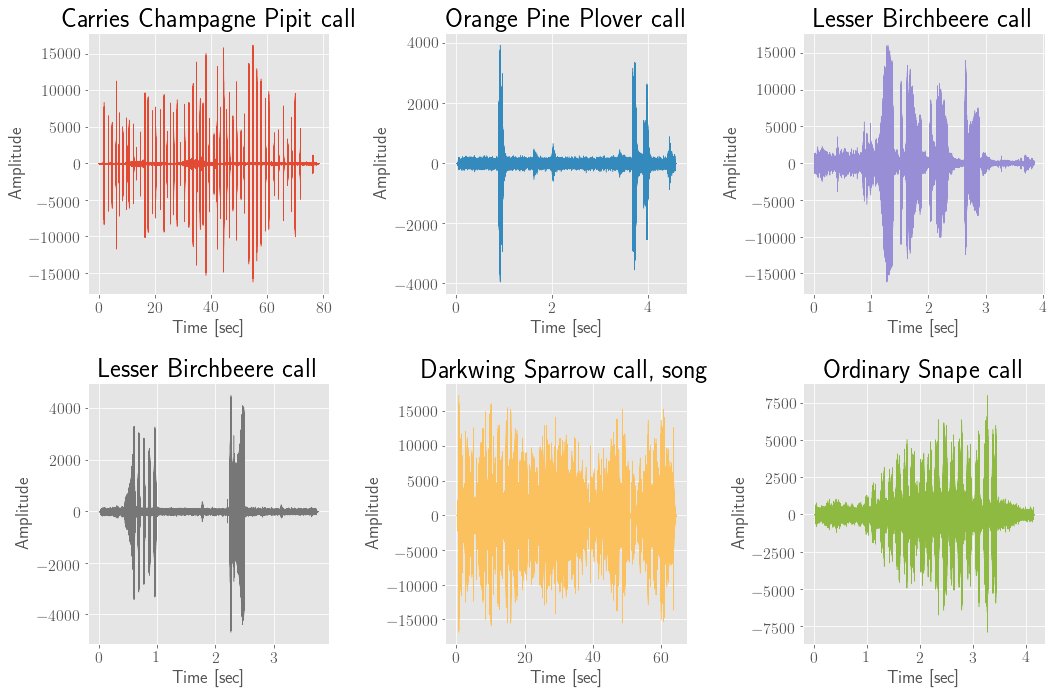

In [43]:
# take random samples
samples = df.sample(6)

folder_path = 'all_birds_wav'
fig = plt.figure(figsize=(15,10))
for i in range(6):
    # read wav file
    file_id = samples.iat[i, 0]
    f = os.path.join(folder_path, '{}.wav'.format(file_id))
    rate, data = wavfile.read(f)
    
    # plot the signal
    ax = fig.add_subplot(2, 3, i+1)
    times = np.arange(len(data))/float(rate)
    title = '{} {}'.format(samples.iat[i, 1], samples.iat[i, 2])
    ax.fill_between(times, data, color="C{}".format(i))
    ax.set_title(title)
    ax.set_xlabel('Time [sec]')
    ax.set_ylabel('Amplitude')
    
plt.tight_layout()

### Frequency representation (2D spectrogram)

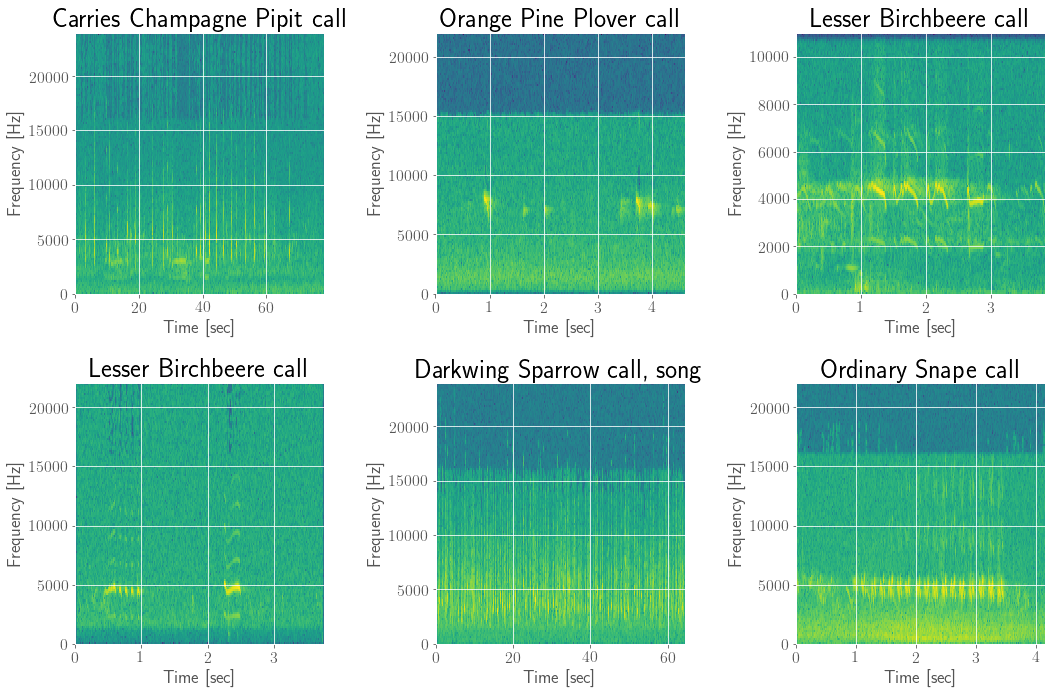

In [45]:
fig = plt.figure(figsize=(15,10))
for i in range(6):
    # read wav file
    file_id = samples.iat[i, 0]
    f = os.path.join(folder_path, '{}.wav'.format(file_id))
    rate, data = wavfile.read(f)

    # plot the spectrogram
    ax = fig.add_subplot(2, 3, i+1)
    title = '{} {}'.format(samples.iat[i, 1], samples.iat[i, 2])
    ax.specgram(data, Fs=rate)
    ax.set_title(title)
    ax.set_xlabel('Time [sec]')
    ax.set_ylabel('Frequency [Hz]')
    
plt.tight_layout()

## Analyze Kasios test birds

Kasios provided 15 birds sounds. According to them, they are songs and calls from the Rose-crested Blue Pipit species. 

**Aim**:  Analyse the Kasios birds tests records and verify from which species each record belongs.

### Visually

The dataset we have been provided contains **186** samples of Rose-crested Blue Pipits sounds. They are **"songs"** and **"calls"**, with different qualities, graded from A to E. Most of them are in good quality. In fact, quality A and B represent **148** records.


We will first visualize some of the Blue Pipits records to identify some characteristics, and then we will compare what we obtained with the Kasios records. 

In [36]:
def plot_signal_temp(df, path, title):
    fig = plt.figure(figsize=(15,15))
    fig.suptitle(title)
    for i in range(9):
        # read wav file
        file_id = df.iat[i, 0]
        f = os.path.join(path, '{}.wav'.format(file_id))
        rate, data = wavfile.read(f)

        # plot the signal
        ax = fig.add_subplot(3, 3, i+1)
        times = np.arange(len(data))/float(rate)
        ax.fill_between(times, data, color="C{}".format(i))
        ax.set_xlabel('Time [sec]')
        ax.set_ylabel('Amplitude')
        ax.set_xlim(0, 20)
        ax.set_ylim(-10000, 10000)

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    
def plot_spectrogram(df, path, title):
    fig = plt.figure(figsize=(15,15))
    fig.suptitle(title)
    for i in range(9):
        # read wav file
        file_id = df.iat[i, 0]
        f = os.path.join(path, '{}.wav'.format(file_id))
        rate, data = wavfile.read(f)

        # plot the spectrogram
        ax = fig.add_subplot(3, 3, i+1)
        ax.specgram(data, Fs=rate)
        ax.set_xlabel('Time [sec]')
        ax.set_ylabel('Frequency [Hz]')
        ax.set_xlim(0, 20)

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

#### Blue Pipit songs

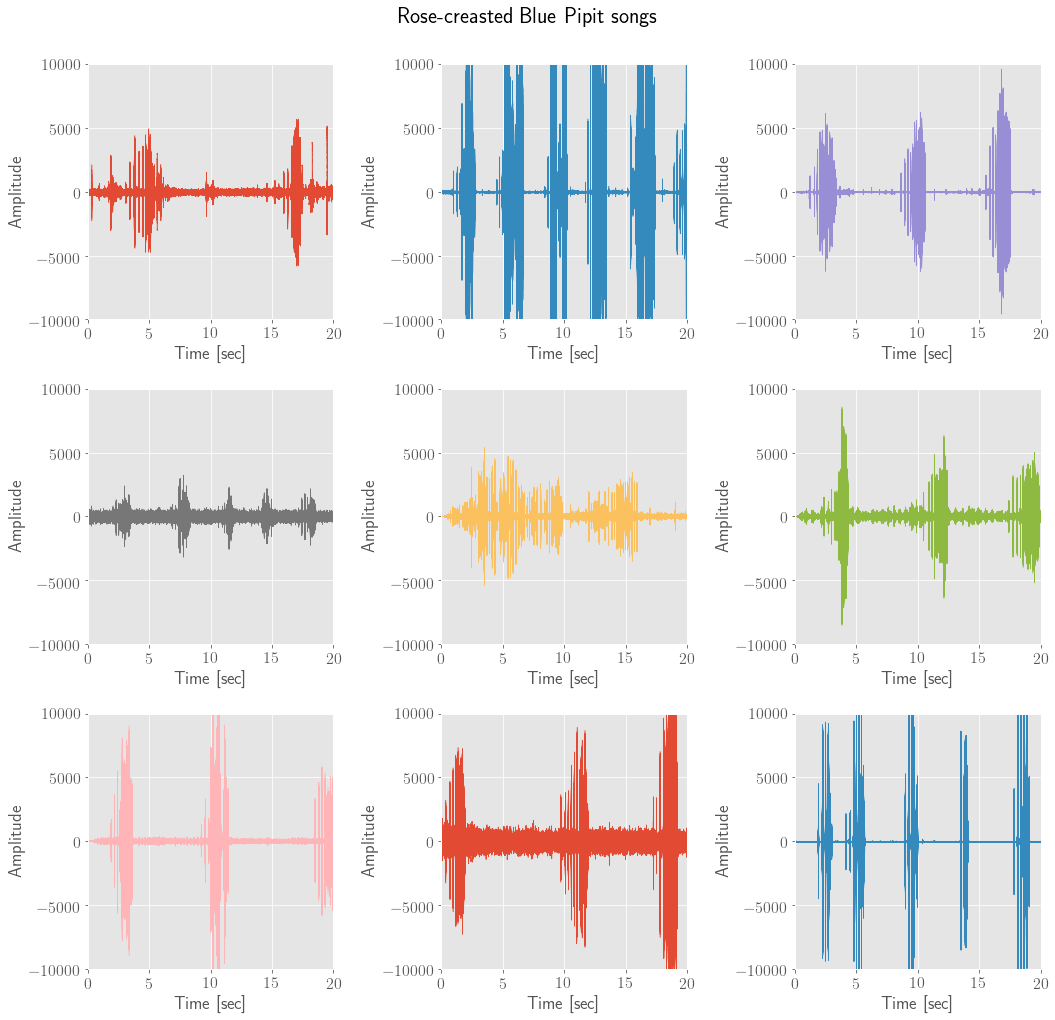

In [37]:
df_bp_songs = df.loc[(df['English_name'] == 'Rose-crested Blue Pipit') 
                     & (df['Vocalization_type'] == 'song')
                     & (df['Quality'] == 'A')]
plot_signal_temp(df_bp_songs, path='all_birds_wav', 
                 title='Rose-creasted Blue Pipit songs')

In [34]:
# plot_spectrogram(df_bp_songs, path='all_birds_wav', 
#                  title='Rose-creasted Blue Pipit songs')

Here, we notice that the songs of the Blue Pipit consist in "song - silence" repetitions. The time of silence varies, but the time of the songs is approximately the same (2 seconds).  

#### Blue Pipit calls

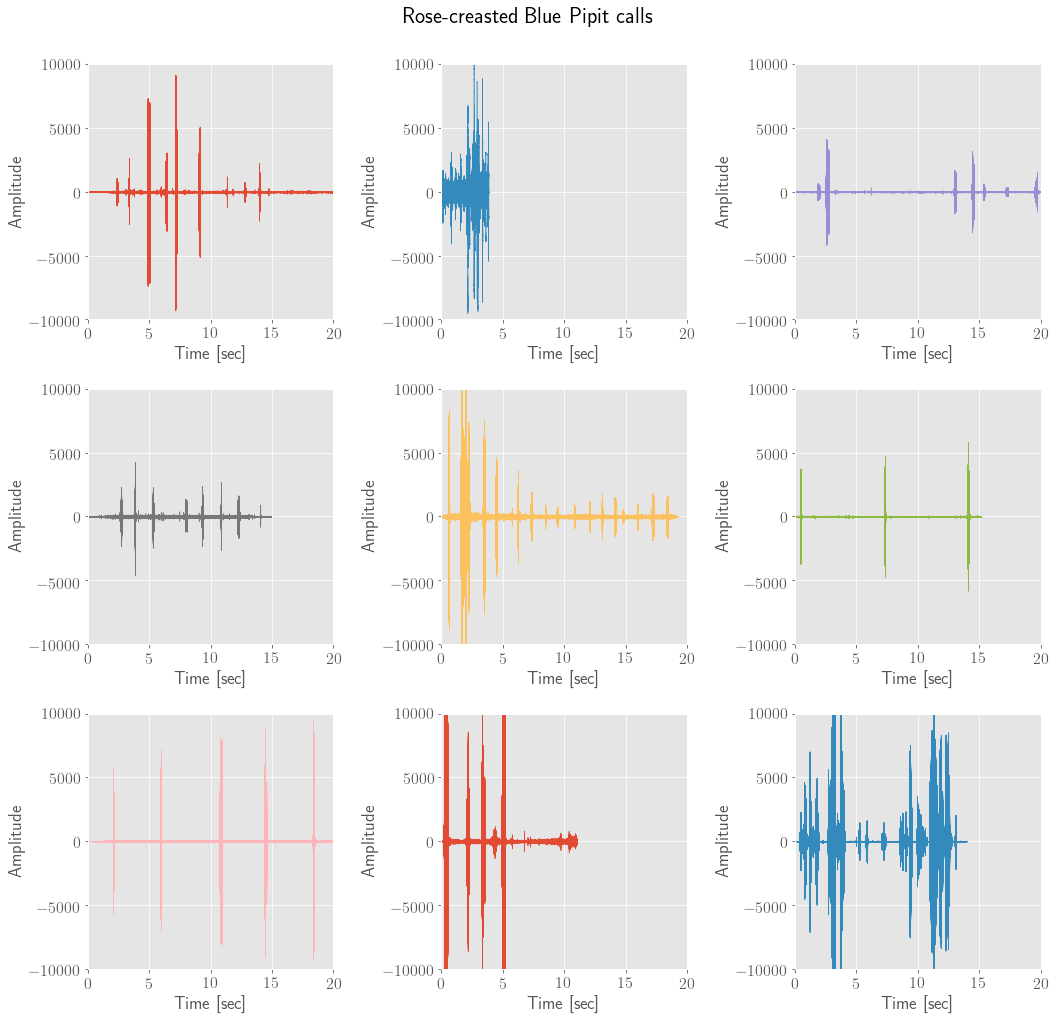

In [38]:
df_bp_calls = df.loc[(df['English_name'] == 'Rose-crested Blue Pipit') 
                    & (df['Vocalization_type'] == 'call')
                    & (df['Quality'] == 'A')]

plot_signal_temp(df_bp_calls, path='all_birds_wav', 
                 title='Rose-creasted Blue Pipit calls')

In [35]:
# plot_spectrogram(df_bp_calls, path='all_birds_wav', 
#                  title='Rose-creasted Blue Pipit calls')

From this plot, we can guess the shape of the Blue Pipits calls. We can distinguish the repetition of three picks:

1. medium amplitude
2. high amplitude
3. medium amplitude

### Kasios files

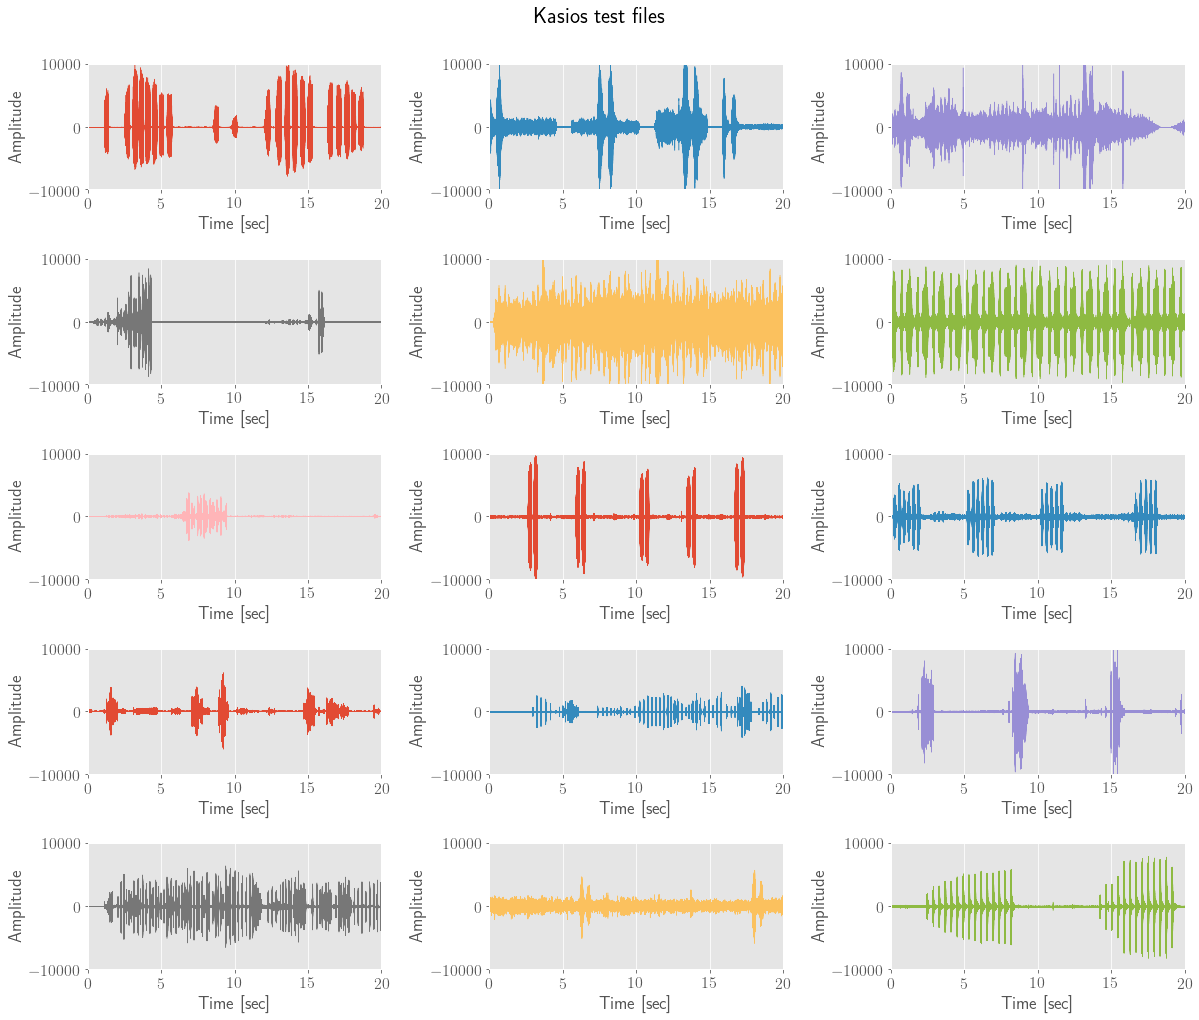

In [21]:
# Get all tests sounds of Kasios
folder_path = 'test_birds_kasios_wav'
files = os.listdir(folder_path)

fig = plt.figure(figsize=(17,15))
fig.suptitle('Kasios test files')
for i, file in enumerate(files):  
    # read wav file
    f = os.path.join(folder_path, file)
    rate, data = wavfile.read(f)
    
    # plot the signal
    ax = fig.add_subplot(5, 3, i+1)
    times = np.arange(len(data))/float(rate)
    ax.fill_between(times, data, color="C{}".format(i%9))
    ax.set_xlabel('Time [sec]')
    ax.set_ylabel('Amplitude')
    ax.set_xlim(0, 20)
    ax.set_ylim(-10000, 10000)
    
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

We notice that most of the signals don't look like the shapes we described for the songs and calls of the Blue Pipits. 